In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [7]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2020-05-19 03:44:02--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 104.31.80.48, 2606:4700:3035::681f:5130, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.03s   

2020-05-19 03:44:02 (15.1 MB/s) - ‘spam.csv’ saved [503663/503663]



In [0]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [9]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
#drop unnecesary columns
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
#rename columns to something better
df.columns = ['labels', 'data']

In [13]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham':0,'spam':1})
Y = df['b_labels'].values

In [0]:
df_train, df_test,Ytrain,Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [0]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [17]:
word2idx  = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7181 unique tokens.


In [18]:
# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor: ', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor:  (3733, 189)


In [20]:
data_test = pad_sequences(sequences_test, maxlen = T)
print('Shape of data test tensor: ', data_test.shape)


Shape of data test tensor:  (1839, 189)


In [0]:
# Create the model

# We get close choose embedding dimensionality
D = 20

#Note: we acatually want to the size of the embedding to (V+1) x D,
# because the firts index starts from 1 and not 0
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V+1.

i = Input(shape=(T,))

x = Embedding(V+1, D)(i)
 
x = Conv1D(32, 3, activation='relu')(x)
 
x = MaxPooling1D(3)(x)
 
x = Conv1D(64, 3, activation = 'relu')(x)
 
x = MaxPooling1D(3)(x)
 
x = Conv1D(128,3,activation='relu')(x)
 
x = GlobalMaxPooling1D()(x)
 
x = Dense(1, activation='sigmoid')(x)
 
model = Model(i,x)

In [30]:
#compile and fit
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

print('Training model...')
r = model.fit(
    data_train,
    Ytrain,
    epochs=5,
    validation_data=(data_test,Ytest)
)

Training model...
Epoch 1/5
117/117 [==============================] - 1s 10ms/step - loss: 0.1574 - accuracy: 0.9317 - val_loss: 0.1018 - val_accuracy: 0.9636
Epoch 2/5
117/117 [==============================] - 1s 9ms/step - loss: 0.0380 - accuracy: 0.9893 - val_loss: 0.0827 - val_accuracy: 0.9788
Epoch 3/5
117/117 [==============================] - 1s 9ms/step - loss: 0.0097 - accuracy: 0.9979 - val_loss: 0.0813 - val_accuracy: 0.9810
Epoch 4/5
117/117 [==============================] - 1s 9ms/step - loss: 0.0039 - accuracy: 0.9997 - val_loss: 0.0654 - val_accuracy: 0.9864
Epoch 5/5
117/117 [==============================] - 1s 9ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.0771 - val_accuracy: 0.9853


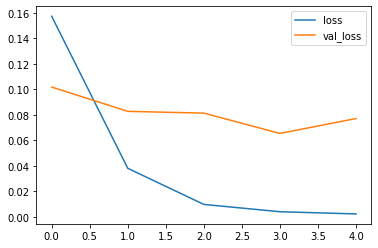

In [31]:
#loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

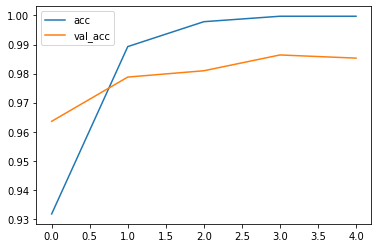

In [32]:
#loss per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()